In [1]:
import gpytorch
import numpy as np
import pandas as pd
import torch

from bo_functions import ExactGPModel
from bo_functions import create_y_data
from bo_functions import bo_iter
from bo_functions import test_train_split
from bo_functions import bo_iter_w_restarts

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

/afs/crc.nd.edu/user/m/mcarlozo/.conda/envs/Toy_Problem_env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 100
train_iter = 300
noise_std = 0.1
restarts = 15
explore_bias = torch.tensor([0.75])
t=4
shuffle_seed = 6
set_lengthscale = None

emulator = True
sparse_grid = False
verbose = False

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

Restart Number:  1


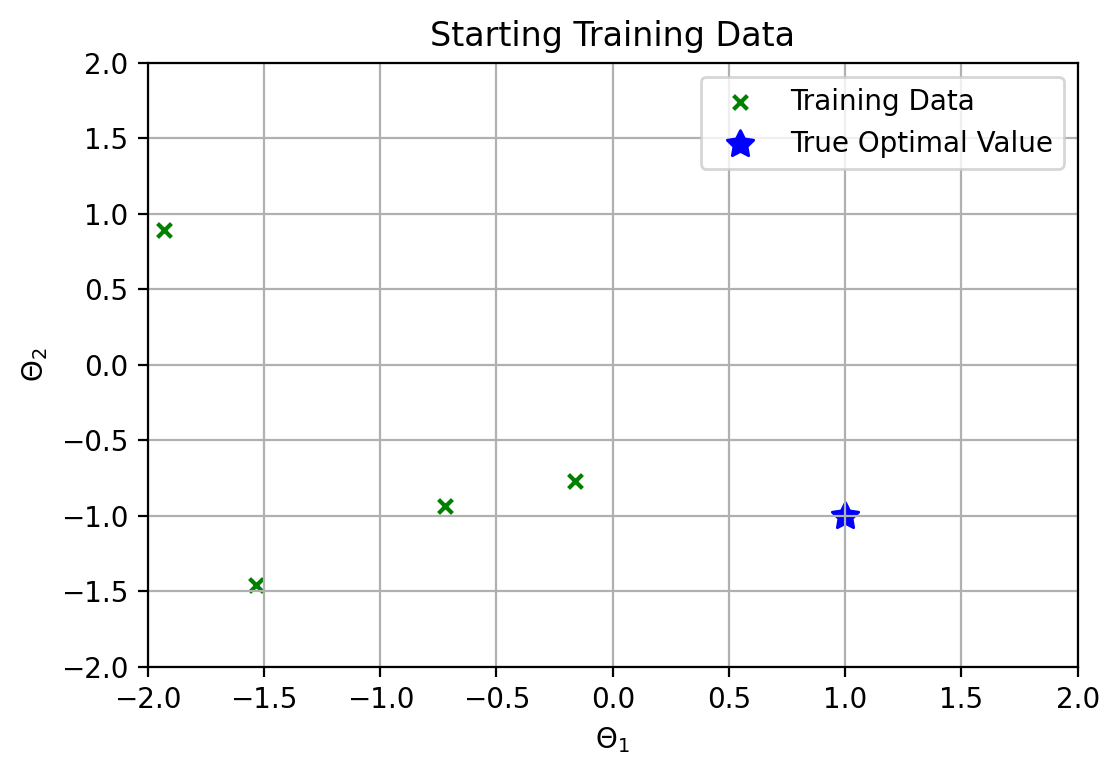

Restart Number:  2


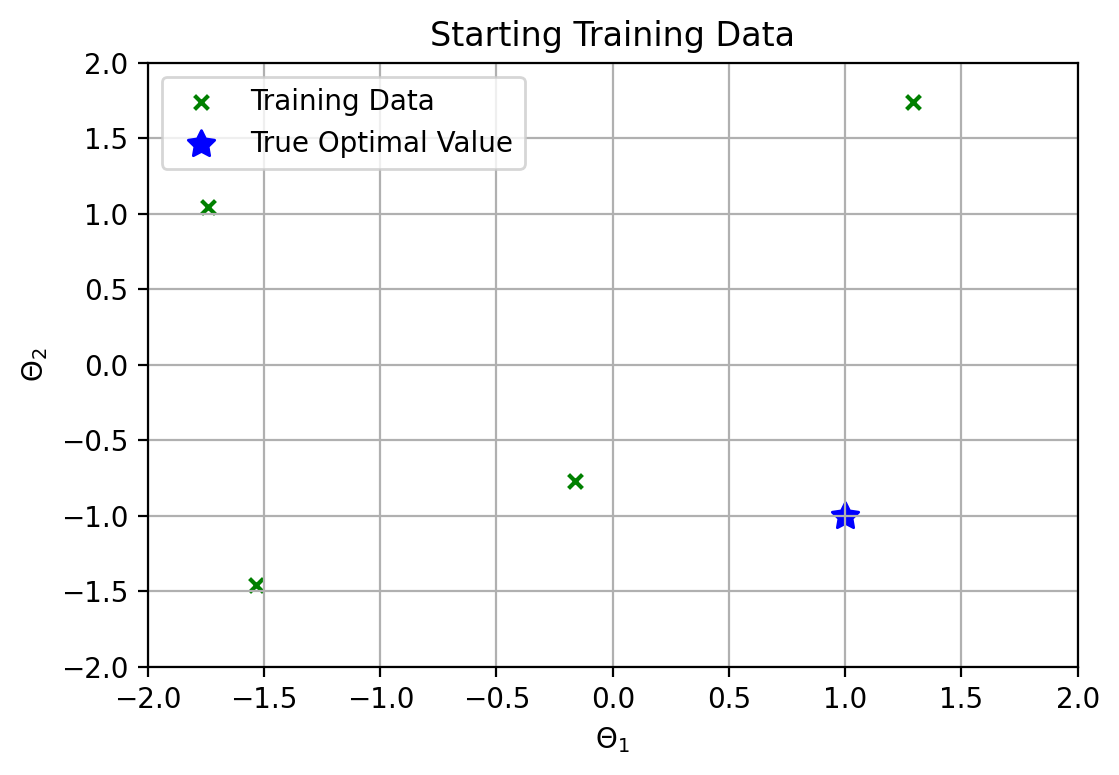

Restart Number:  3


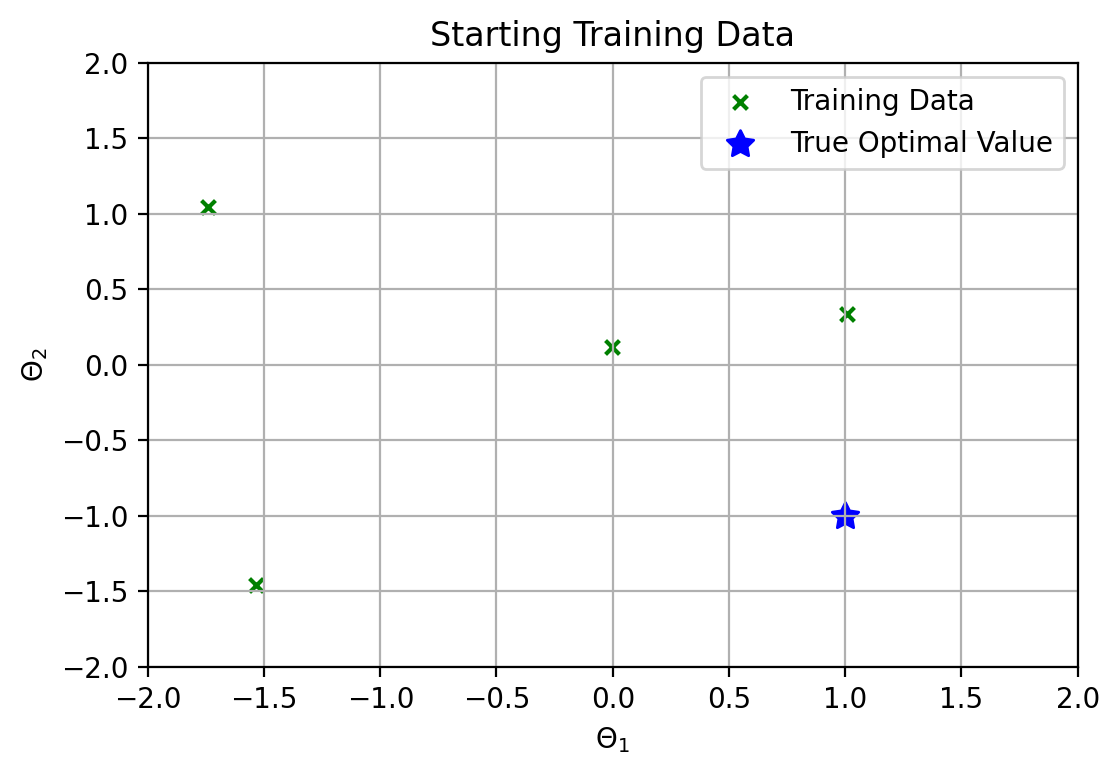

Restart Number:  4


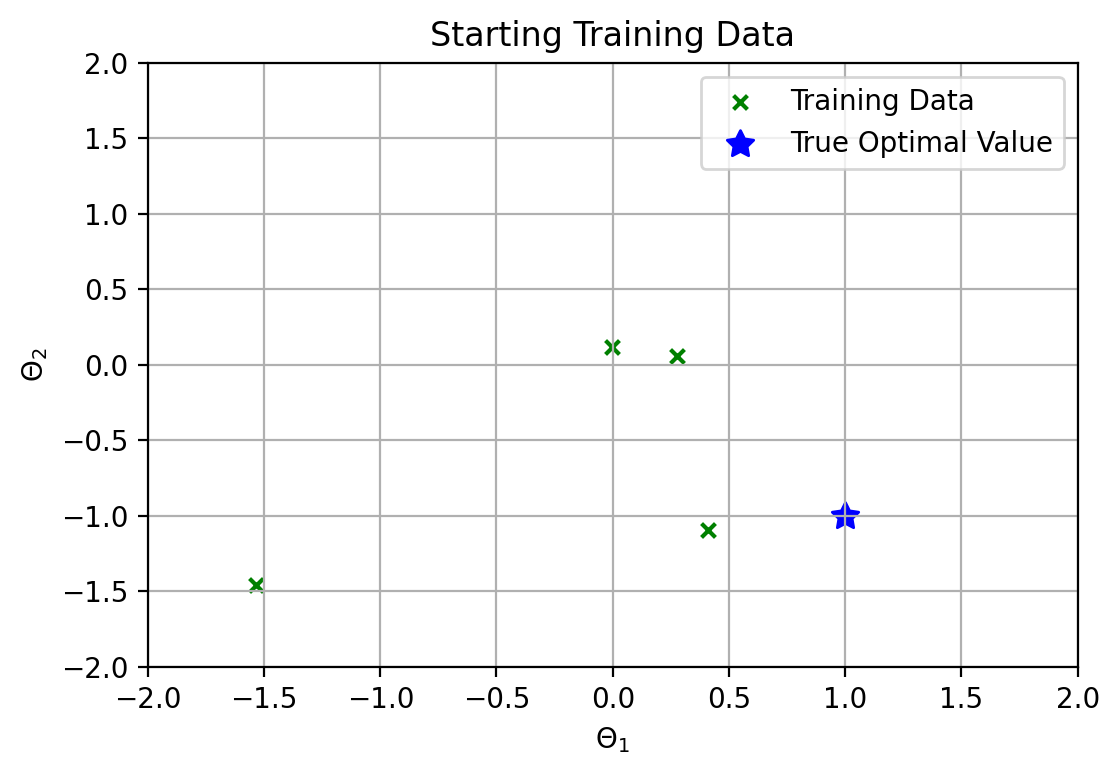

Restart Number:  5


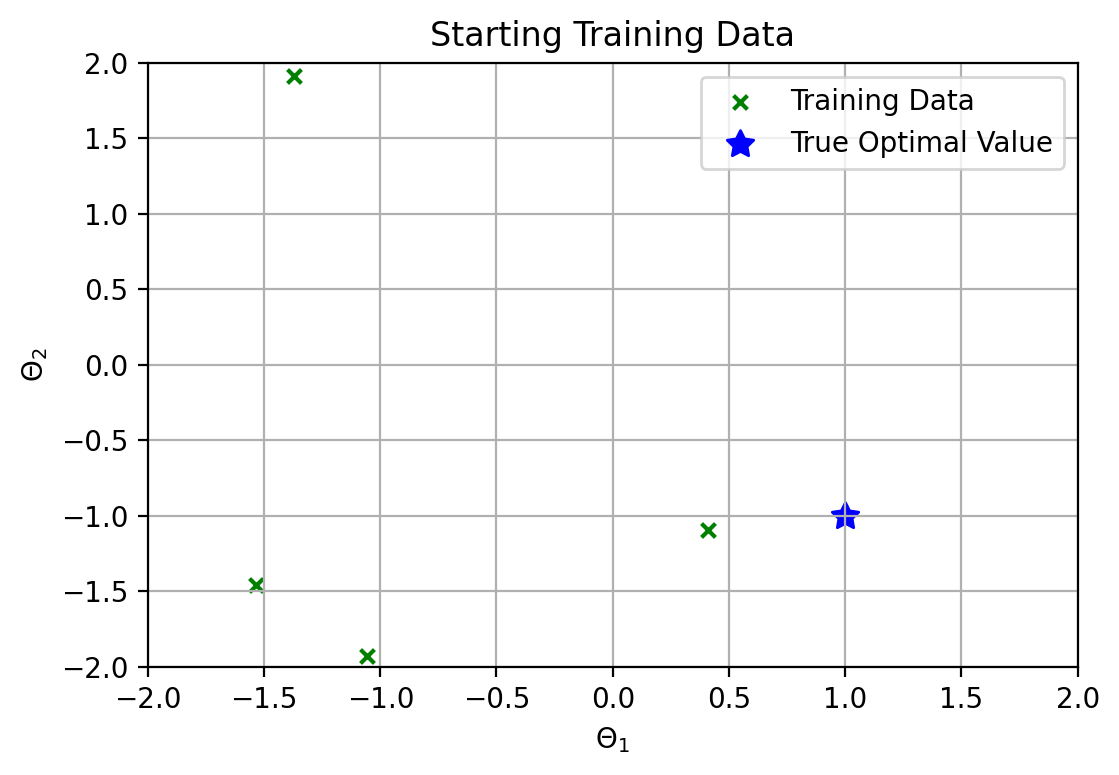

Restart Number:  6


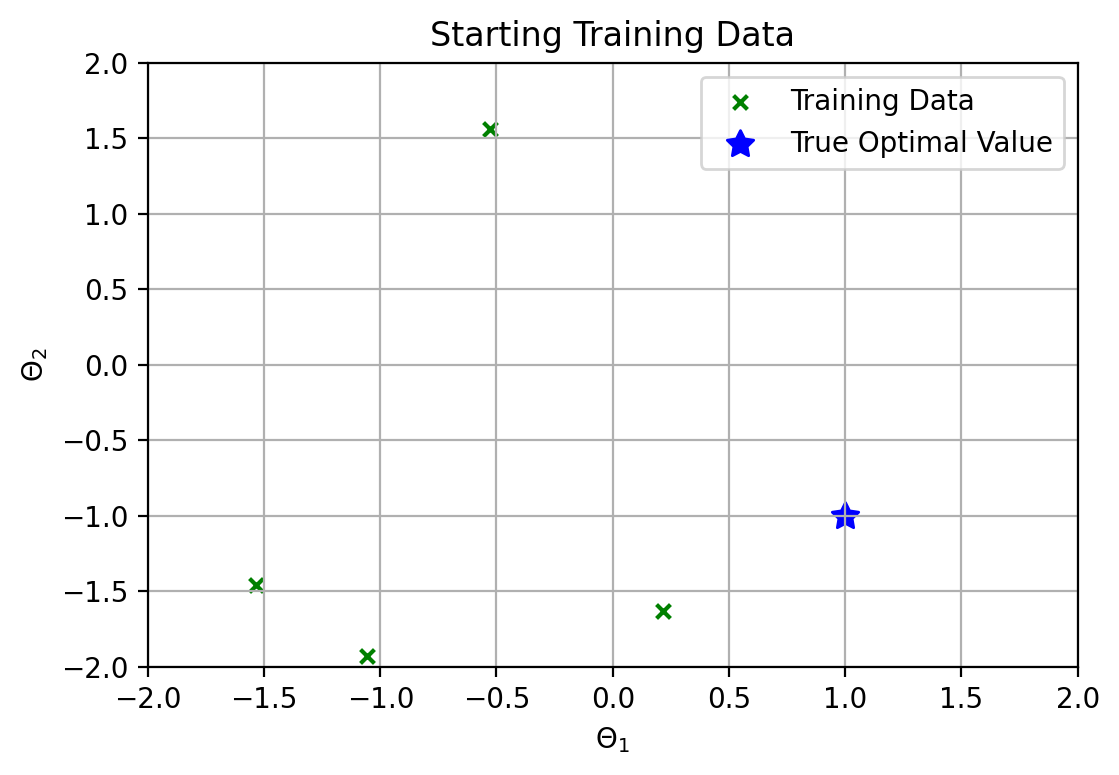

Restart Number:  7


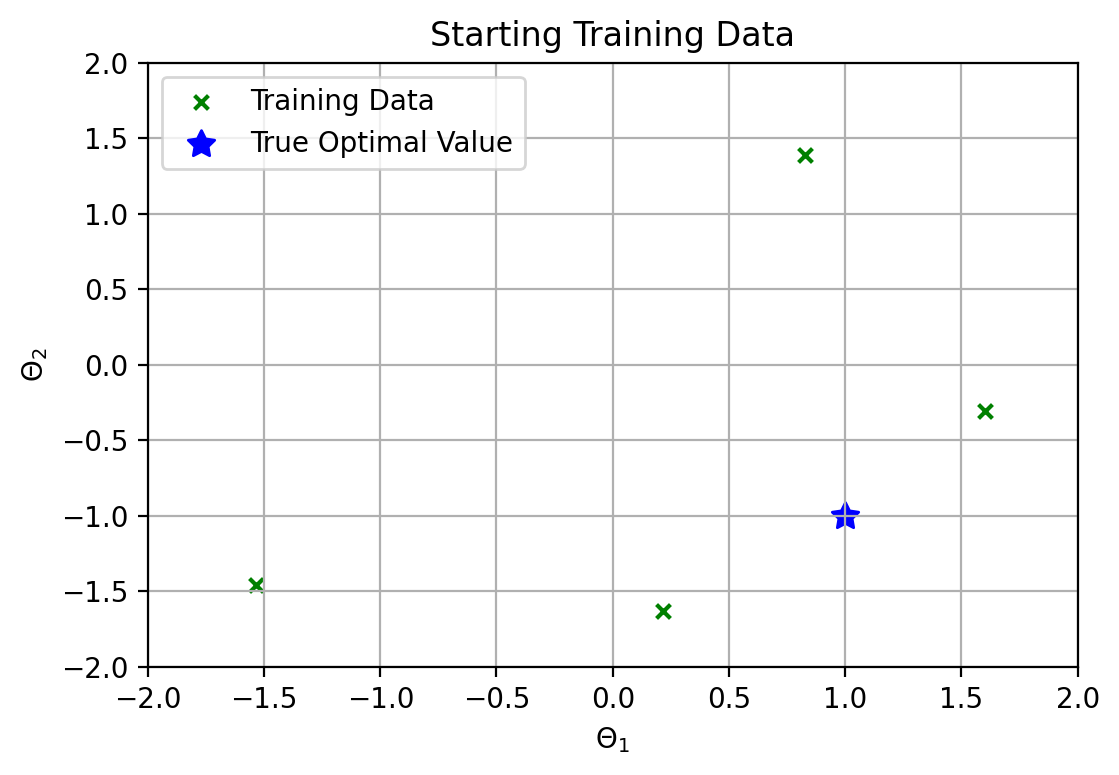

Restart Number:  8


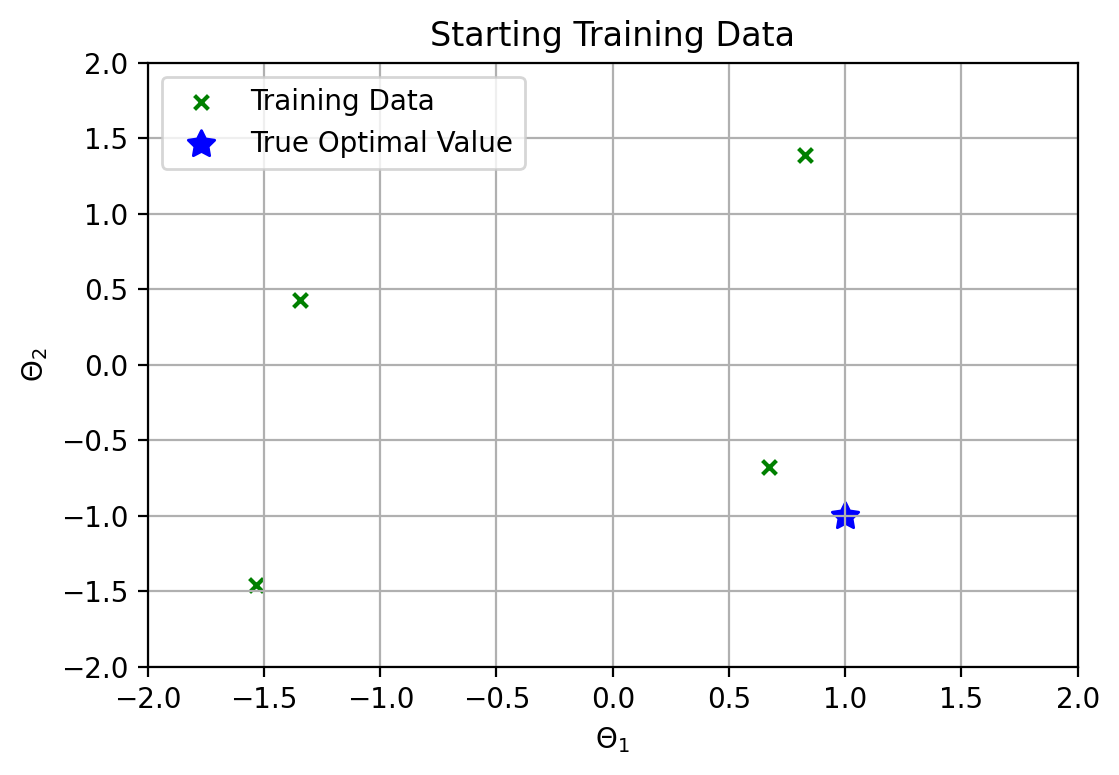

Restart Number:  9


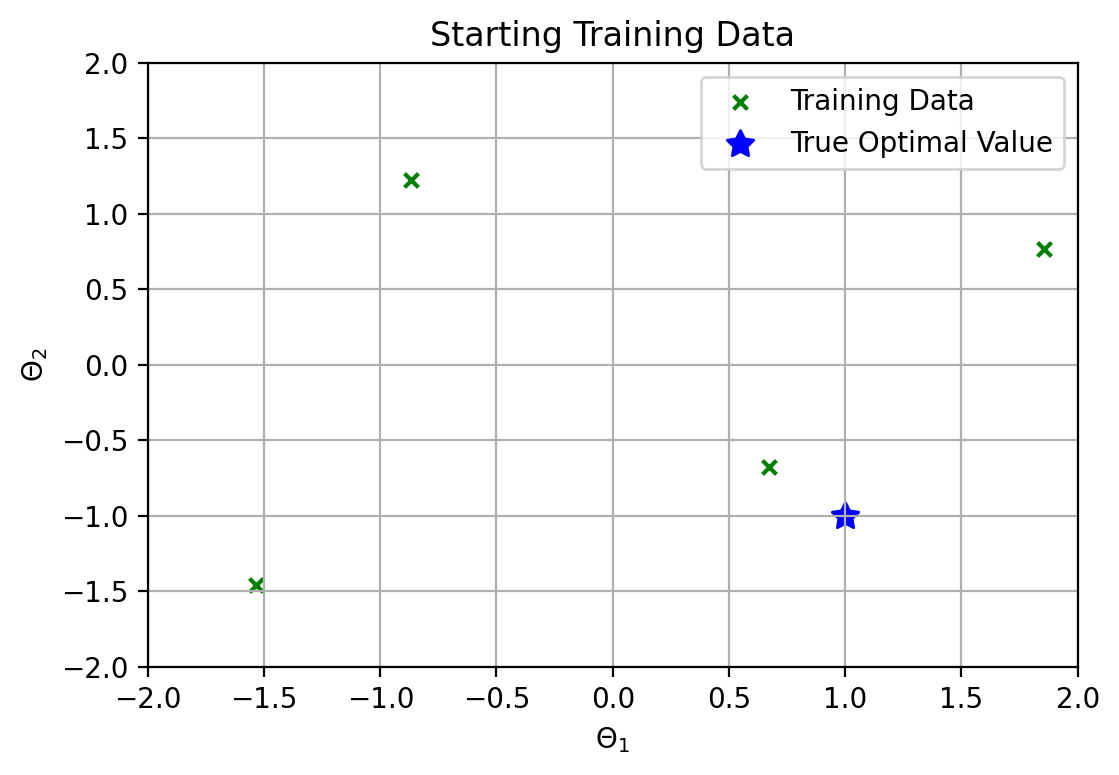

Restart Number:  10


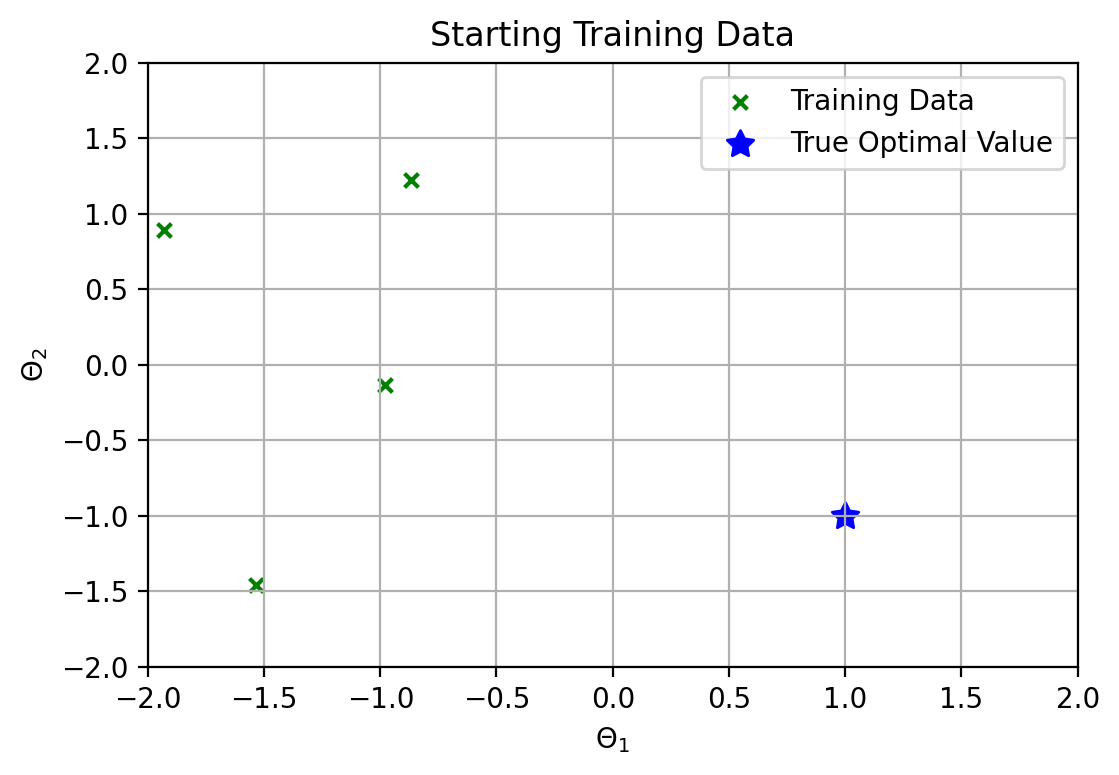

Restart Number:  11


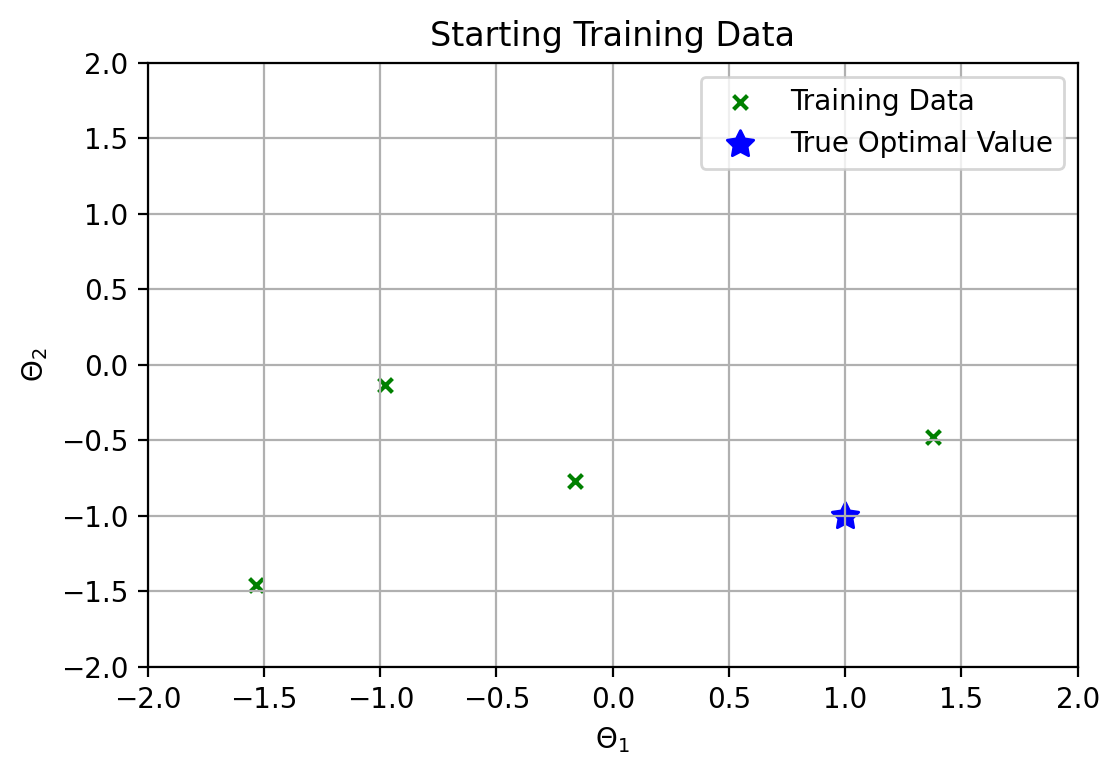

Restart Number:  12


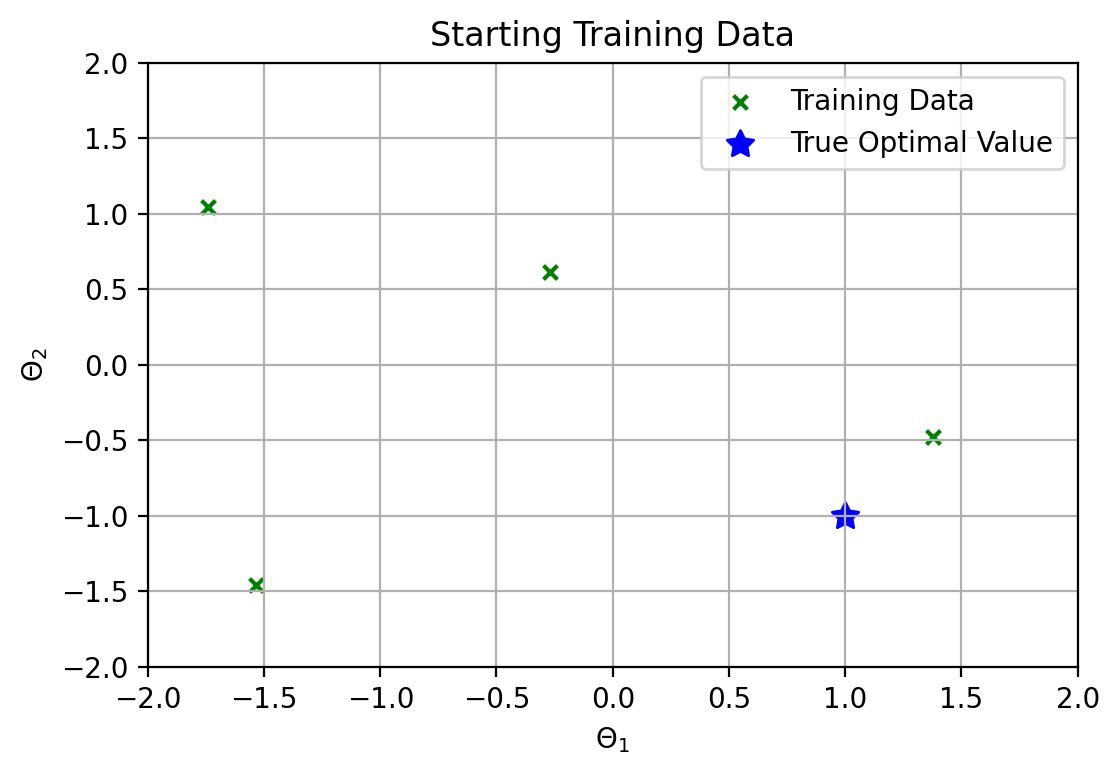

Restart Number:  13


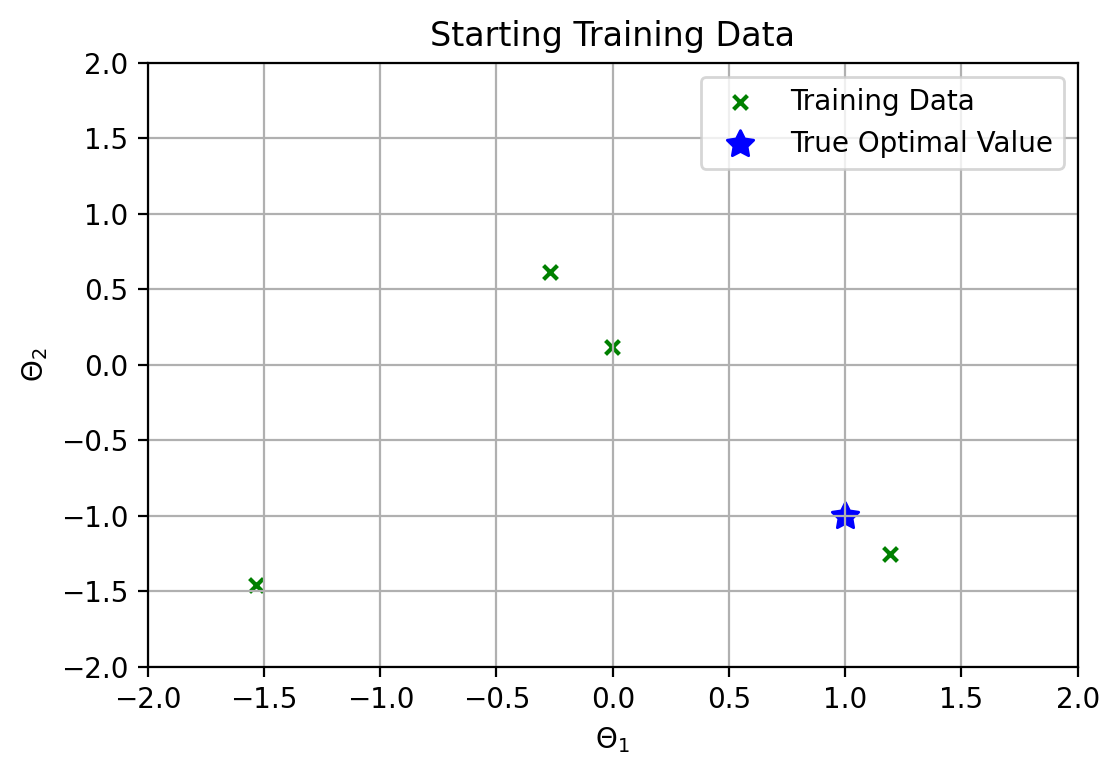

Restart Number:  14


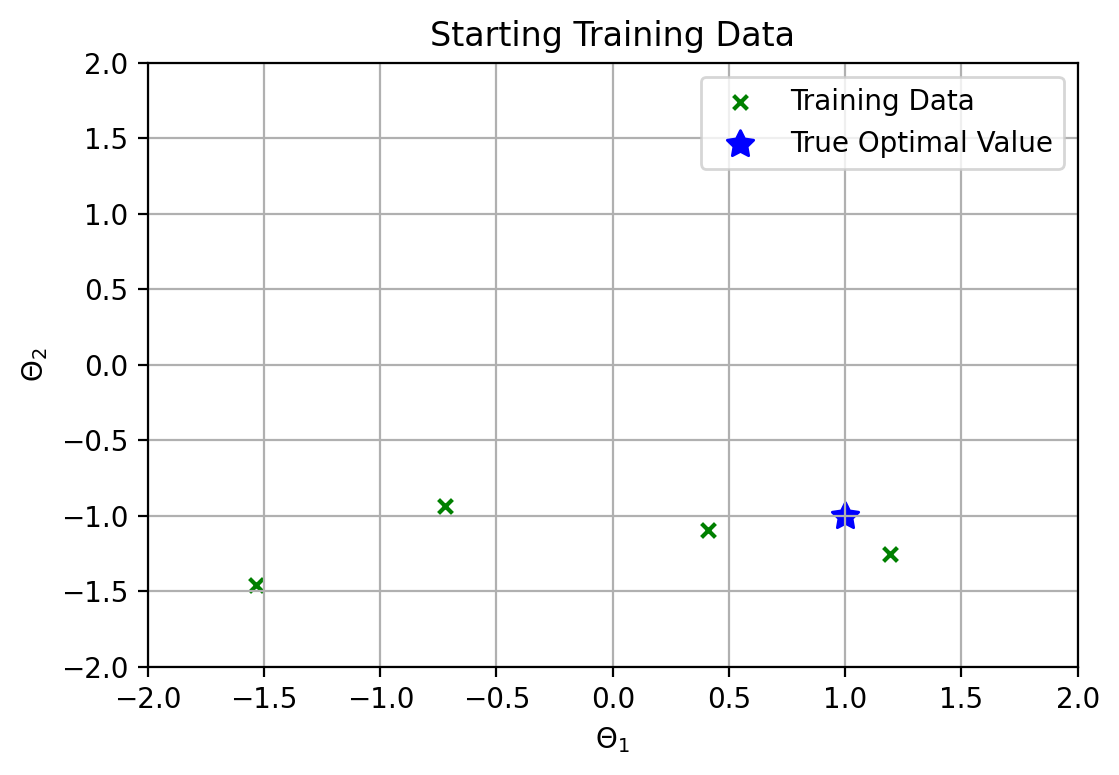

Restart Number:  15


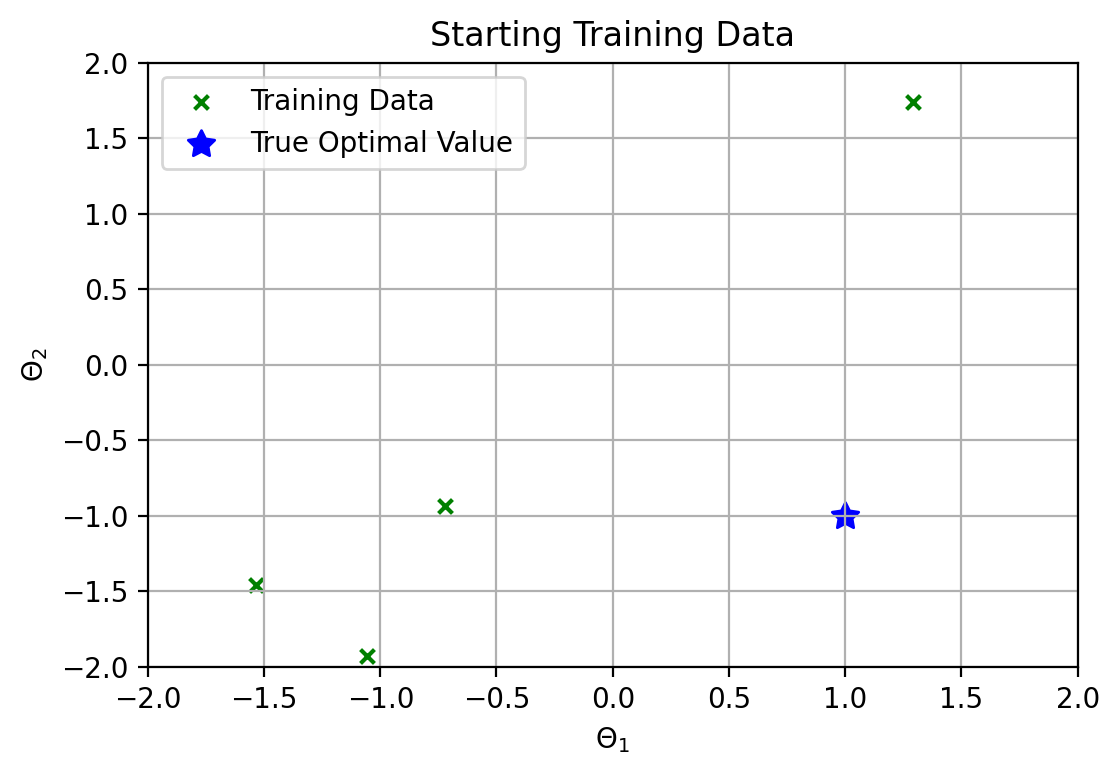

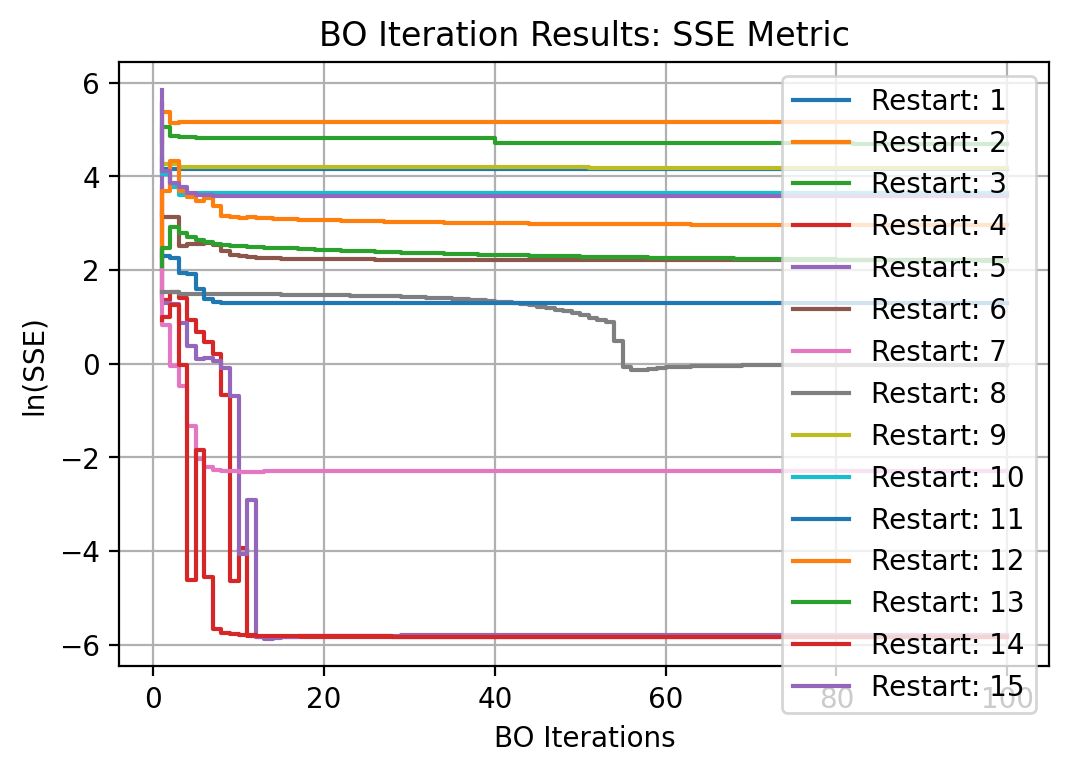

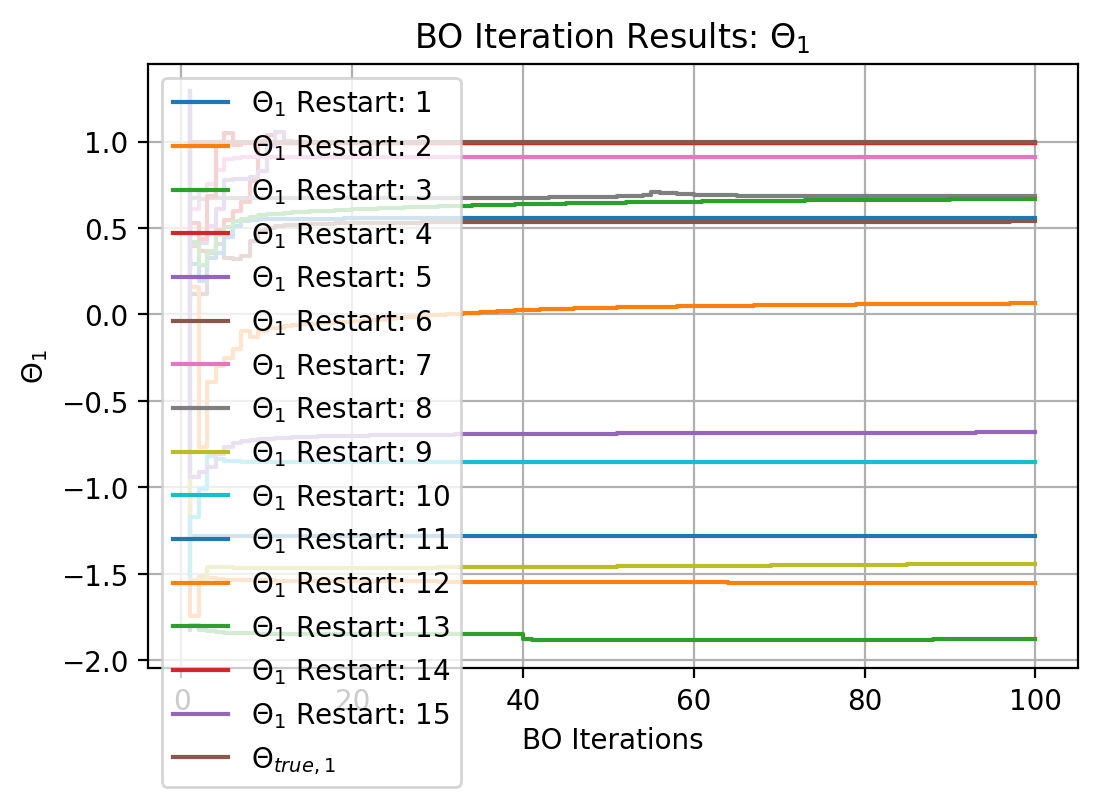

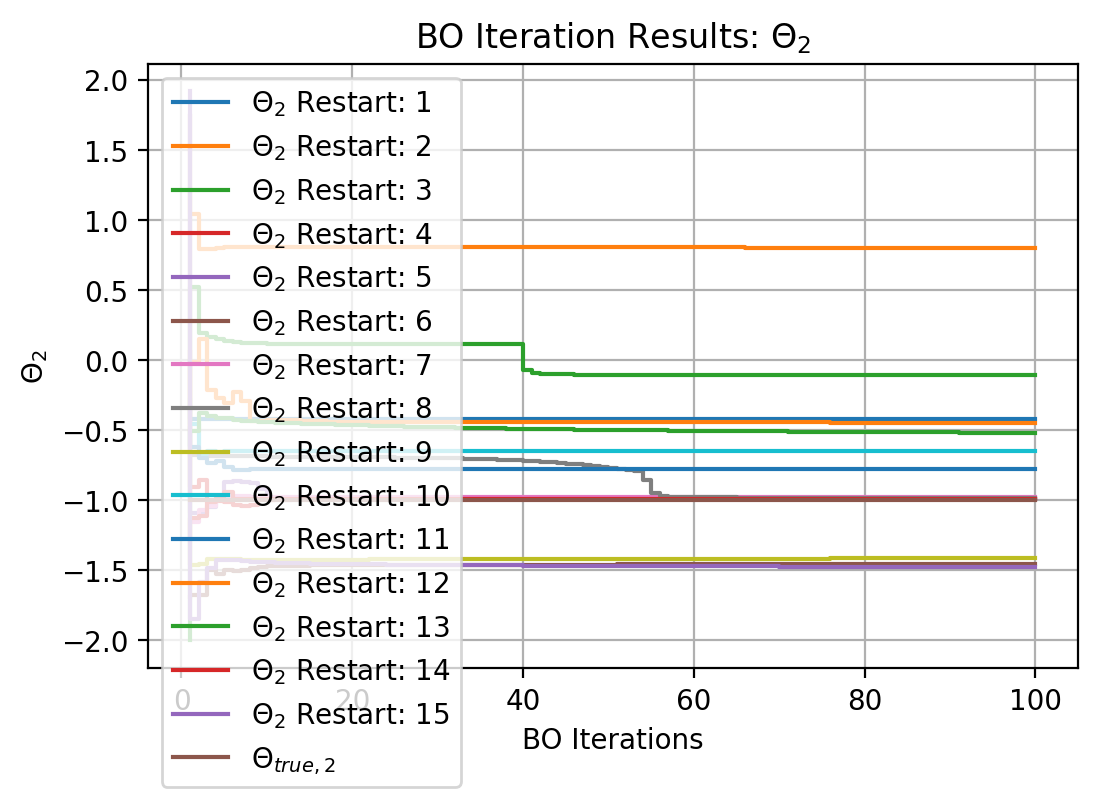

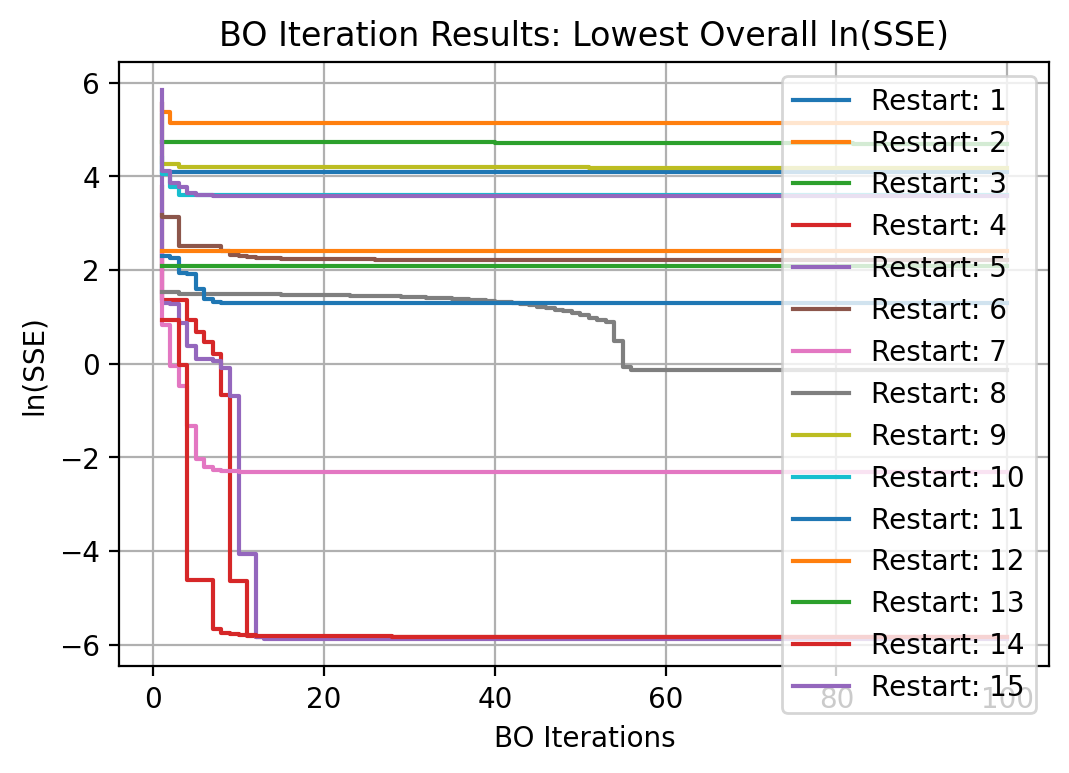

The GP predicts the lowest SSE of 2.811e-03 occurs at θ = [ 0.99604056 -0.9943636 ] during restart 5 at BO iteration 14


In [7]:
%%time
save_fig=False
# sparse_grid = True

obj = "obj"

all_data_doc = "Input_CSVs/Train_Data/all_3_data/t=25.csv"
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))   

results = bo_iter_w_restarts(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,explore_bias, Xexp, Yexp,
                             noise_std, obj, restarts, sparse_grid, emulator, set_lengthscale, verbose, 
                             save_fig, shuffle_seed)
print("The GP predicts the lowest SSE of", "{:.3e}".format(np.exp(results[3])), "occurs at \u03B8 =", results[2][0], 
          "during restart", results[1], "at BO iteration", results[0])